In [1]:
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Import train & test data 
train = pd.read_csv('A:/5610-ML/TitanicDataset/train.csv')
test = pd.read_csv('A:/5610-ML/TitanicDataset/test.csv')
#gender_submission = pd.read_csv('A:/5610-ML/TitanicDataset/gender_submission.csv') # example of what a submission should look like

In [3]:
# View the training data
train.head(15) #head will help us view the first 15 elements.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
len(train) #length of the training dataset

891

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

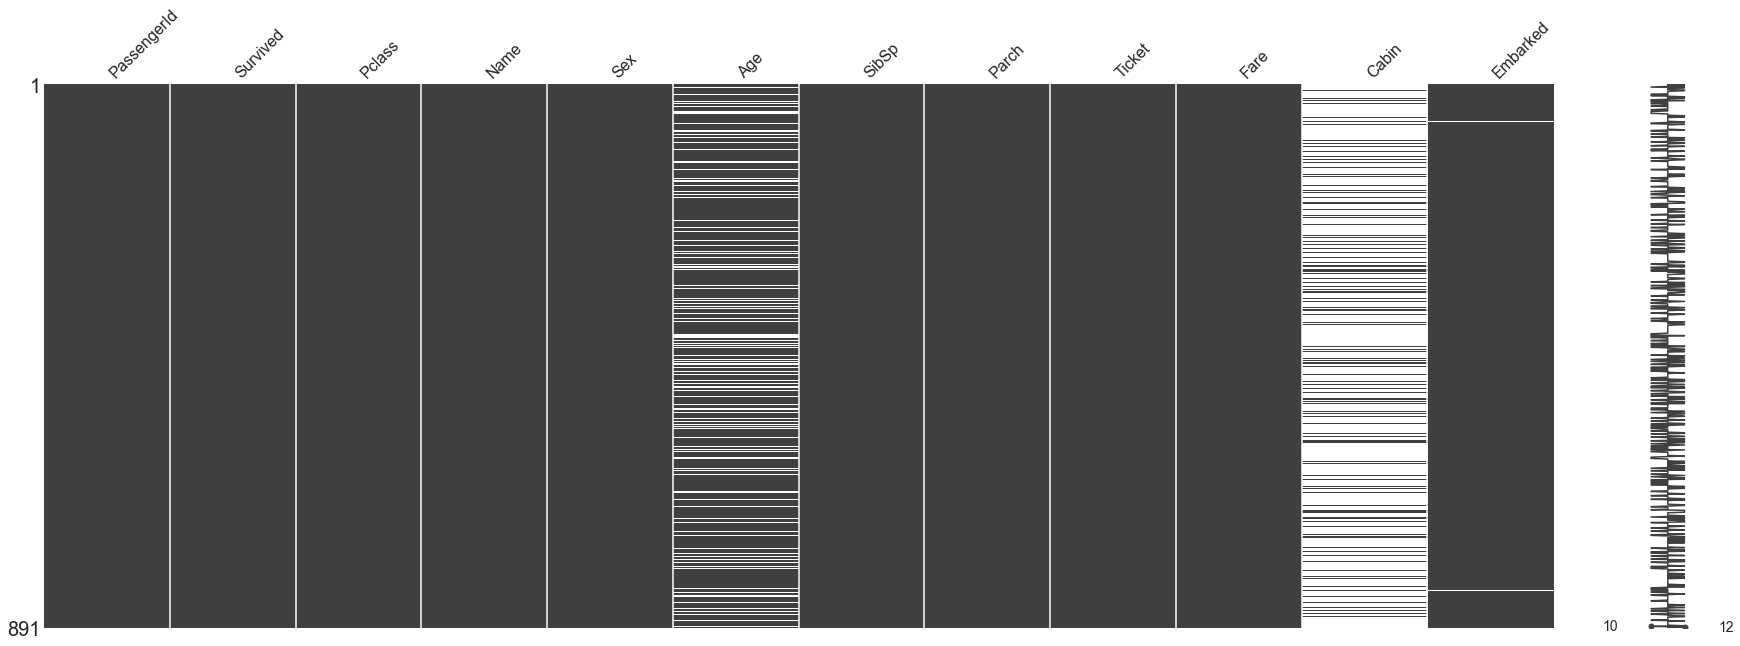

In [6]:
#First find the missing values because it will help us predict more accurately.
#We can see which columns have missing values graphically by using the missingno library's function called matrix, bar, etc.
missingno.matrix(train, figsize = (30,10))

<AxesSubplot:>

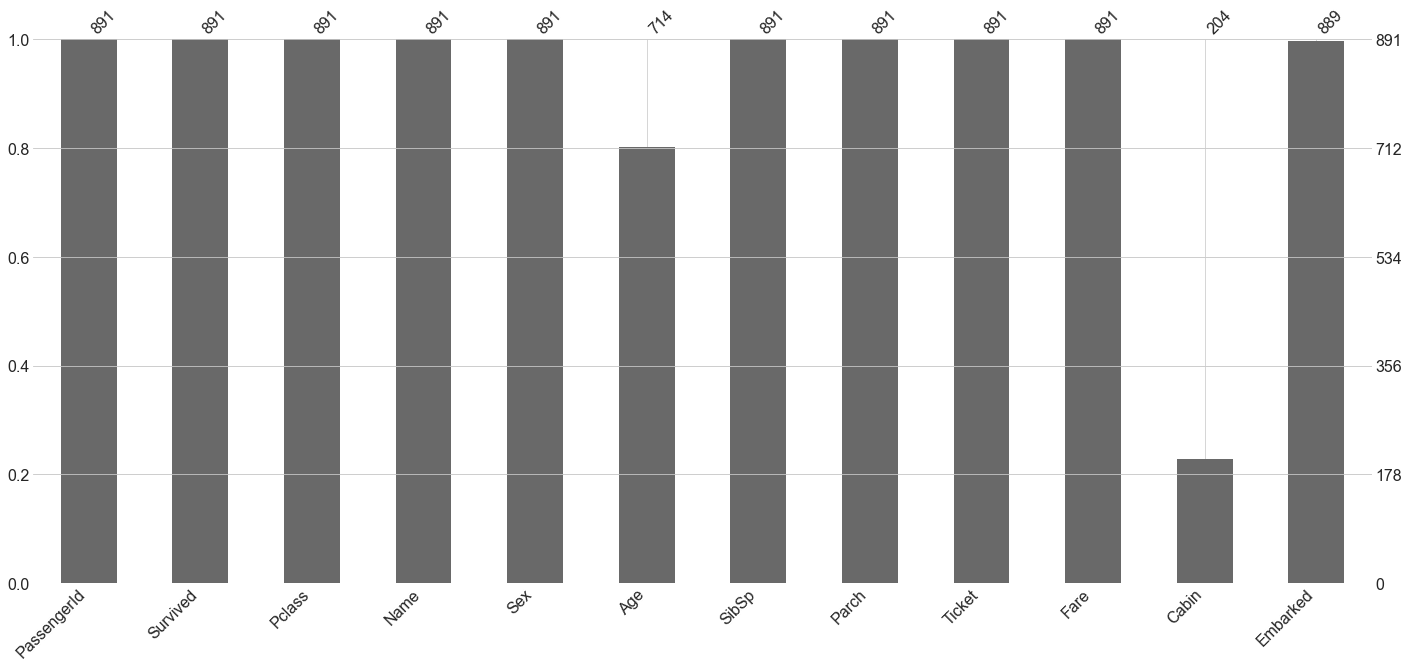

In [7]:
missingno.bar(train)

In [8]:
train.describe(include=['O']) #['0'] shows descriptive statistics

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Quick, Miss. Phyllis May",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.isnull().sum() #count of NaN values in a column/features

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#In this section we analyse the relationship between different features wrt to Survival using visual diagrams.
#Survived
train.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

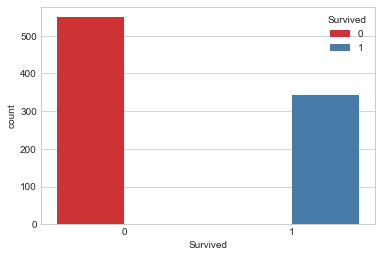

In [12]:
sns.countplot(x = 'Survived', hue= 'Survived',palette = 'Set1' ,data = train)

In [13]:
# RelationShip between Pclass and Survived 
print (train.Pclass.value_counts())

train.groupby('Pclass').Survived.value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64


Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

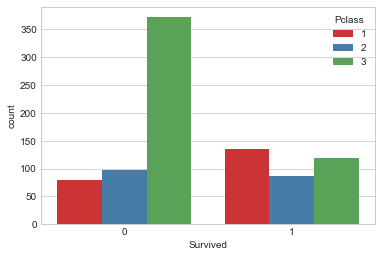

In [14]:
sns.countplot(x = 'Survived', hue= 'Pclass',palette = 'Set1' ,data = train)
#We can say higher class passengers have better survival chance.

In [15]:
print(train.Sex.value_counts())

train.groupby('Sex').Survived.value_counts()

male      577
female    314
Name: Sex, dtype: int64


Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

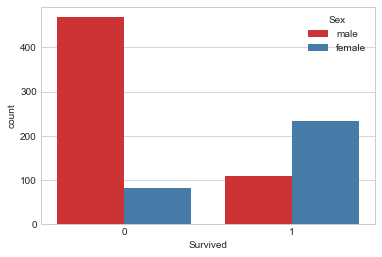

In [16]:
sns.countplot(x = 'Survived', hue= 'Sex',palette = 'Set1' ,data = train)

#We can say here that females have higher survival chance.

<AxesSubplot:xlabel='Survived', ylabel='count'>

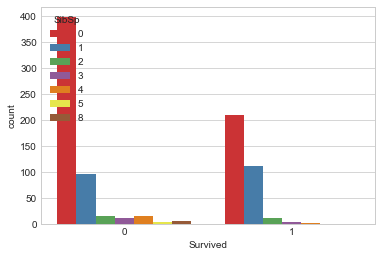

In [17]:
sns.countplot(x = 'Survived', hue= 'SibSp',palette = 'Set1' ,data = train)



<AxesSubplot:xlabel='Survived', ylabel='count'>

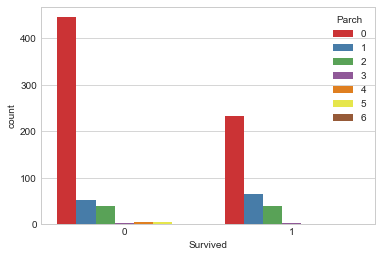

In [18]:
sns.countplot(x = 'Survived', hue= 'Parch',palette = 'Set1' ,data = train)



A:\Anaconda3\Setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

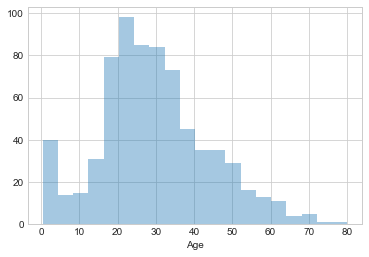

In [19]:
#Next is Age. Age has 177 missing values. We can assign the average age values to fill the missing but 
#lets see the relationship between age group and the age values.

#Distribution for Age

sns.distplot(train['Age'], kde = False)

In [20]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:

train["Age"].mean()

29.69911764705882

In [22]:
#Average value assigned to the missing fields since we pretty much have an even distribution.
train['Age'].fillna(train['Age'].mean(), inplace =True)

train.head(15)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
#Since cabin has very large number of missing values we will probably drop the column further.
#Embarked feature has 2 missing values

train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

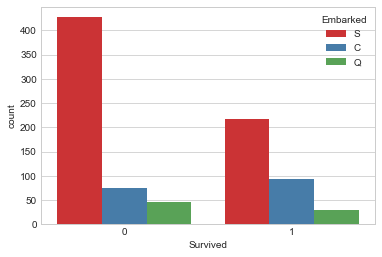

In [24]:
#Plot
sns.countplot(x = 'Survived', hue= 'Embarked',palette = 'Set1' ,data = train)


In [25]:
#As we can see that majority of the Embarked port is 'S'
#Hence we can fill in the missing Emarked port to 'S'

print (train['Embarked'].mode()[0])

train['Embarked'].fillna(train['Embarked'].mode()[0],inplace = True)

S


In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [27]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [28]:
#train.drop(['SibSp','Parch','Ticket'],axis = 1)

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
#Now that we have zero NaN values we will now bring some categorical features in numeric format e.g sex, Embarked.

#Sex = pd.get_dummies(train['Sex'],drop_first = True) #It converts categorical data into dummy or indicator variables.

#OR 

train.loc[train['Sex'] == 'female', 'Sex'] = 1
train.loc[train['Sex'] == 'male', 'Sex'] = 0


train.loc[train['Embarked'] == 'S', 'Embarked'] = 0
train.loc[train['Embarked'] == 'C', 'Embarked'] = 1
train.loc[train['Embarked'] == 'Q', 'Embarked'] = 2


In [30]:
train.drop(['Ticket'],axis = 1, inplace= True)
train.drop(['Name'],axis = 1, inplace= True)
train.drop(['Cabin'],axis = 1, inplace= True)
train.drop(['PassengerId'],axis = 1, inplace= True)
train.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [31]:
#Now that we have done our data pre-processing and Feature selection lets go ahead and fine tune decision tree model

from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis=1)
y = train['Survived']

#splits data into random train and test subsets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.25)



In [32]:
#Use Decsion tree classifier.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_prediction = dt.predict(X_test)

#print the predictions
print (classification_report(y_test, dt_prediction))

# Score
print("Training Acurracy:", round(dt.score(X_train, y_train)*100, 2))
print("Test Accuracy:", round(dt.score(X_test, y_test)*100, 2))


              precision    recall  f1-score   support

           0       0.77      0.85      0.81       131
           1       0.76      0.64      0.69        92

    accuracy                           0.77       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.77      0.77      0.76       223

Training Acurracy: 98.35
Test Accuracy: 76.68


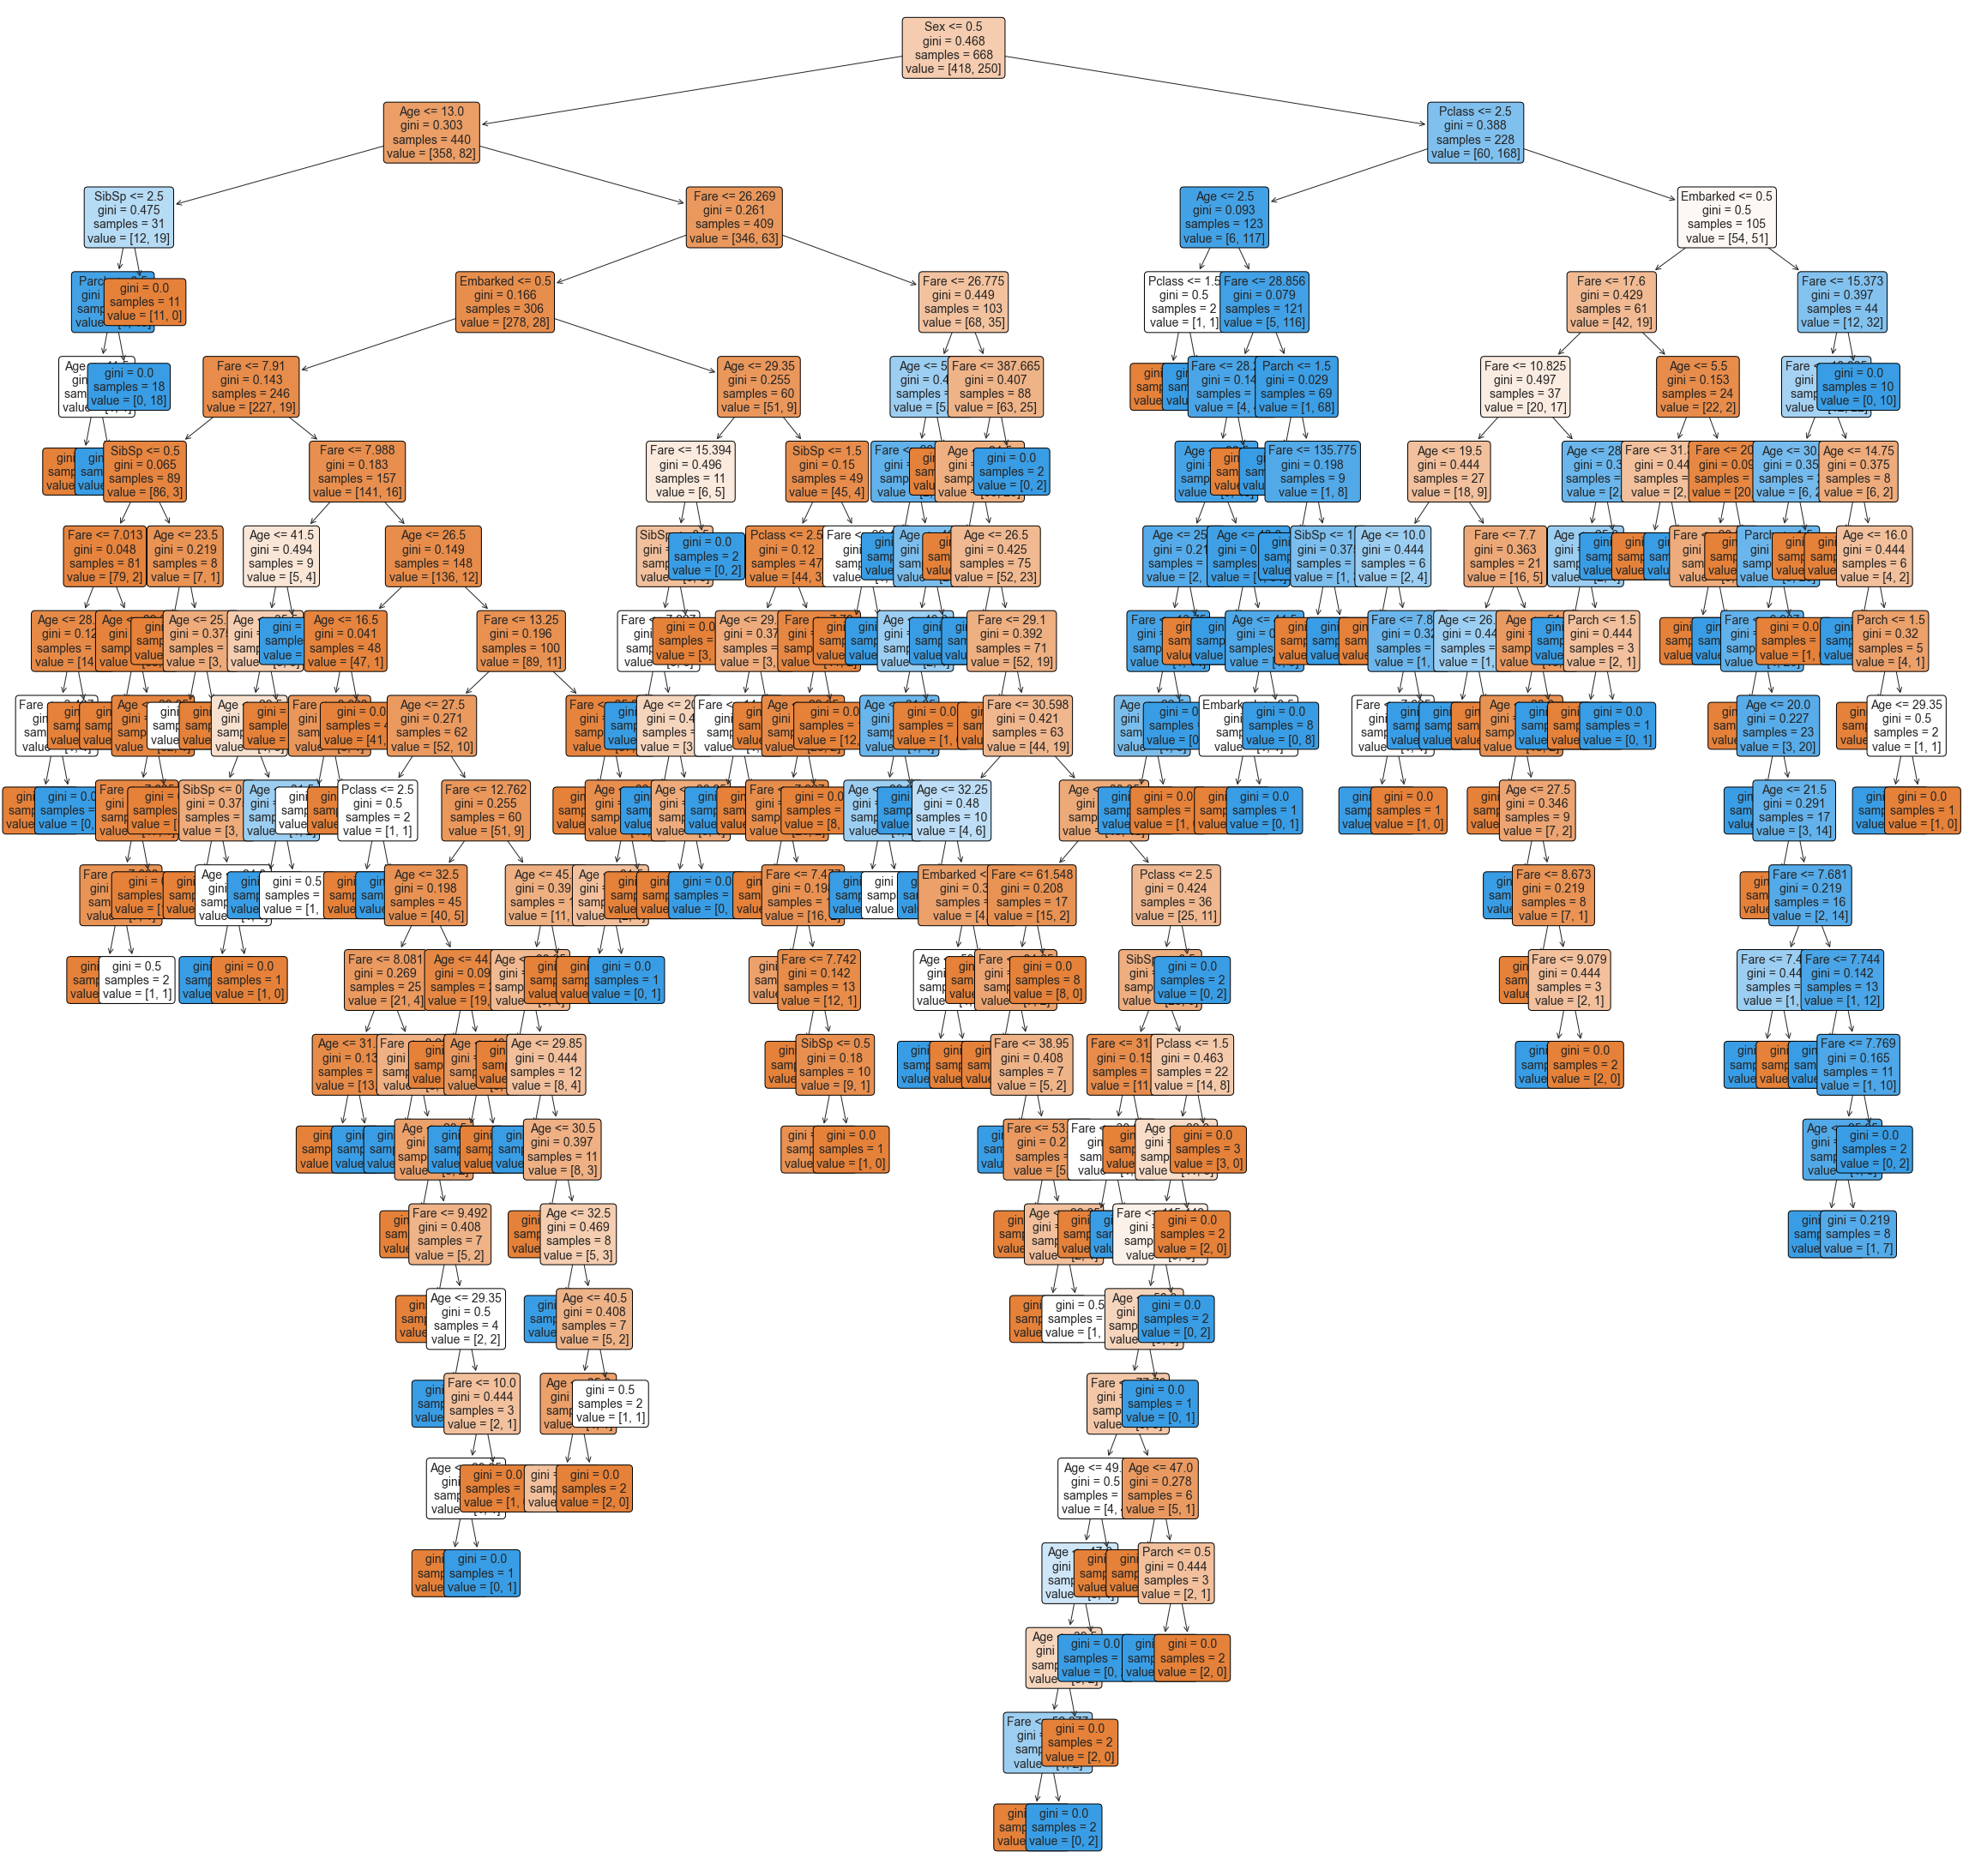

In [33]:
dt.get_depth()

from sklearn import tree
import matplotlib.pyplot as plt
np.random.seed(29)
#plt the figure
plt.figure(figsize = (40,40))

#create the tree plot
a = tree.plot_tree(dt, feature_names = X_train.columns,
                   rounded = True,
                   filled = True,
                   fontsize=14)

#show the plot
plt.show()

In [34]:
#We need to fine tune our model

from sklearn.model_selection import GridSearchCV

#np.random.seed(21)
parameters = {'criterion': ['gini','entropy'], 'max_depth': [3,4,5,6,7,8,9,10], 'min_samples_leaf' : [1,2,3,4,5]}

DTC = DecisionTreeClassifier()
DT_grid = GridSearchCV(DTC, param_grid = parameters,n_jobs=-1)
DT_grid.fit(X_train, y_train)

print ( " Best Score :",DT_grid.best_score_ *100)
print ("Best parameters : ", DT_grid.best_params_)
print ("Best Estimater :",DT_grid.best_estimator_.get_params())

#now lets use this best features to fine tune our model


fineTuned_model = DT_grid.best_estimator_.set_params()

print("Training dataset acurracy for decision tree with best parameters:" , fineTuned_model.score(X_train, y_train)*100)
print("Test Accuracy of DT with best parameters: ", fineTuned_model.score(X_test, y_test)*100)

 Best Score : 85.18011446526765
Best parameters :  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5}
Best Estimater : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training dataset acurracy for decision tree with best parameters: 88.47305389221557
Test Accuracy of DT with best parameters:  81.16591928251121


Best Score : 85.1789922567613
Best parameters :  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5}
Best Estimater : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Training dataset acurracy for decision tree with best parameters: 88.47305389221557
Test Accuracy of DT with best parameters:  81.16591928251121

Acurracy of Decision Tree After applying Cross Validation :  82.38026489234824
Cross Validation scores for Decision Tree:  [81.56, 81.46, 85.39, 80.34, 83.15]


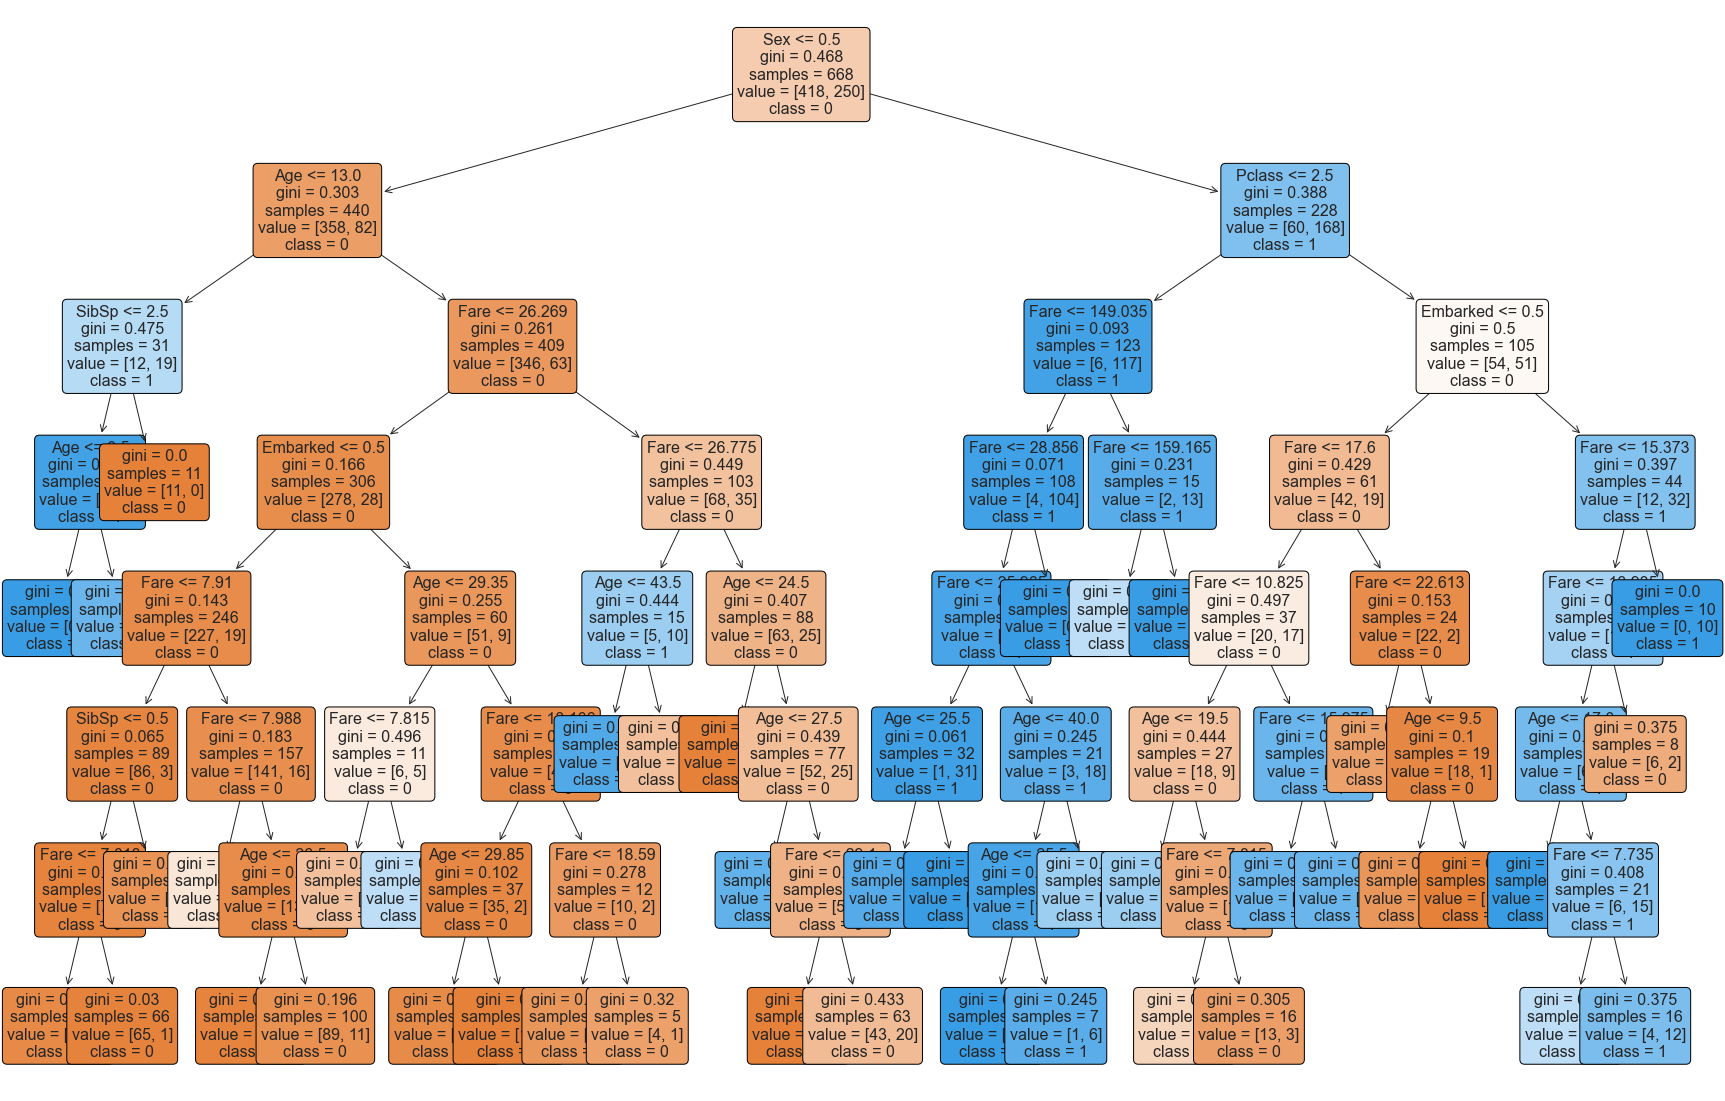

In [35]:
#We need to fine tune our model #COMPLETE PROCEDURE 

from sklearn.model_selection import GridSearchCV

np.random.seed(38)
parameters = {'criterion': ['gini','entropy'], 'max_depth': [3,4,5,6,7,8,9,10], 'min_samples_leaf' : [1,2,3,4,5]}

DTC = DecisionTreeClassifier()
DT_grid = GridSearchCV(DTC, param_grid = parameters,n_jobs=-1, cv=5)
DT_grid.fit(X_train, y_train)

print ( "Best Score :",DT_grid.best_score_ *100)
print ("Best parameters : ", DT_grid.best_params_)
print ("Best Estimater :",DT_grid.best_estimator_.get_params())

#now lets use this best features to fine tune our model


fineTuned_model = DT_grid.best_estimator_

print("\nTraining dataset acurracy for decision tree with best parameters:" , fineTuned_model.score(X_train, y_train)*100)
print("Test Accuracy of DT with best parameters: ", fineTuned_model.score(X_test, y_test)*100)


from sklearn.model_selection import cross_val_score
#np.random.seed(24)

# 5 fold cross validation score
scores = cross_val_score(fineTuned_model, X, y, cv=5)
print("\nAcurracy of Decision Tree After applying Cross Validation : ",scores.mean() *100)
print("Cross Validation scores for Decision Tree: ", [round(score*100, 2) for score in scores])


#Plot the graph

from sklearn import tree
import matplotlib.pyplot as plt
#np.random.seed(29)
#plt the figure
plt.figure(figsize = (30,20))

#create the tree plot
a = tree.plot_tree(fineTuned_model, feature_names = X_train.columns, class_names = ['0','1'],
                   rounded = True,
                   filled = True,
                   fontsize=16)

#show the plot
plt.show()

In [36]:
#Use Random forest classifier.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

rf_prediction = random_forest.predict(X_test)

#print the predictions
print (classification_report(y_test, rf_prediction))

# Score
print("Training Acurracy default parameters:", round(random_forest.score(X_train, y_train)*100, 2))
print("Test Accuracy default parameters:", round(random_forest.score(X_test, y_test)*100, 2))


#lets fine tune the parameters.

parameters = {'n_estimators' : [50,100,125,150],
               'criterion' : ['gini','entropy'],
                 'max_depth' : [3,4,5,6,7,8],
             'min_samples_leaf' : [1,2,3,4,5,6]}



RF_grid = GridSearchCV(random_forest, param_grid = parameters,n_jobs=-1)
RF_grid.fit(X_train, y_train)

print ( "\nBest Score :",RF_grid.best_score_ *100)
print ("\nBest parameters : ", RF_grid.best_params_)
print ("\nBest Estimater :",RF_grid.best_estimator_.get_params())



#now lets use this best features to fine tune our model


fineTuned_model = RF_grid.best_estimator_

print("\nTraining dataset acurracy for Random Forest with best parameters:" , fineTuned_model.score(X_train, y_train)*100)
print("Test Accuracy of Random Forest with best parameters: ", fineTuned_model.score(X_test, y_test)*100)


from sklearn.model_selection import cross_val_score
#np.random.seed(24)

# 5 fold cross validation score
scores = cross_val_score(fineTuned_model, X, y, cv=5)
print("\nAcurracy of Random Forest after cross fold validation: ", round(np.mean(scores)*100, 2))
print("Cross Validation scores for random Forest: ", [round(score*100, 2) for score in scores])




              precision    recall  f1-score   support

           0       0.79      0.89      0.84       131
           1       0.81      0.65      0.72        92

    accuracy                           0.79       223
   macro avg       0.80      0.77      0.78       223
weighted avg       0.80      0.79      0.79       223

Training Acurracy default parameters: 98.35
Test Accuracy default parameters: 79.37

Best Score : 85.1789922567613

Best parameters :  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 125}

Best Estimater : {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 125, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Training data

In [60]:
#Use SVM classifier.

from sklearn.svm import SVC
from sklearn.metrics import classification_report

#np.random.seed(24)
svc = SVC()
svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)

#print the predictions
print (classification_report(y_test, svc_prediction))

# Score
print("Training Acurracy default parameters:", round(svc.score(X_train, y_train)*100, 2))
print("Test Accuracy default parameters:", round(svc.score(X_test, y_test)*100, 2))


 #lets fine tune the parameters.

parameters = {'kernel' : ['linear','rbf','poly'],
            'degree' : [2,3,4],
            }



RF_grid = GridSearchCV(svc, param_grid = parameters,n_jobs=-1)
RF_grid.fit(X_train, y_train)

print ( "\nBest Score :",RF_grid.best_score_ *100)
print ("\nBest parameters : ", RF_grid.best_params_)
print ("\nBest Estimater :",RF_grid.best_estimator_.get_params())



#now lets use this best features to fine tune our model


fineTuned_model = RF_grid.best_estimator_

print("\nTraining dataset acurracy for SVM with best parameters:" , fineTuned_model.score(X_train, y_train)*100)
print("Test Accuracy of SVM with best parameters: ", fineTuned_model.score(X_test, y_test)*100)


from sklearn.model_selection import cross_val_score


# 5 fold cross validation score
scores = cross_val_score(fineTuned_model, X, y, cv=5)
print("\nAcurracy of SVM after cross fold validation: ", round(np.mean(scores)*100, 2))
print("Cross Validation scores for SVM: ", [round(score*100, 2) for score in scores])





              precision    recall  f1-score   support

           0       0.66      0.92      0.77       131
           1       0.74      0.34      0.46        92

    accuracy                           0.68       223
   macro avg       0.70      0.63      0.62       223
weighted avg       0.69      0.68      0.64       223

Training Acurracy default parameters: 68.71
Test Accuracy default parameters: 67.71

Best Score : 78.74088205588599

Best parameters :  {'degree': 2, 'kernel': 'linear'}

Best Estimater : {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Training dataset acurracy for SVM with best parameters: 78.74251497005989
Test Accuracy of SVM with best parameters:  78.47533632286996

Acurracy of SVM after cross fold validation:  78.79
Cross Valida

In [59]:
#Use Linear SVM classifier.

from sklearn.svm import SVC
from sklearn.metrics import classification_report

np.random.seed(24)

#Using linear kernel

svc = SVC(kernel = 'linear', gamma = 'auto',random_state = 0)
svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)

#print the predictions
print (classification_report(y_test, svc_prediction))




from sklearn.model_selection import cross_val_score

# 5 fold cross validation score
scores = cross_val_score(svc, X, y, cv=5)
print("\nAcurracy of LINEAR SVM after cross fold validation: ", round(np.mean(scores)*100, 2))
print("Cross Validation scores for LINEAR SVM: ", [round(score*100, 2) for score in scores])





              precision    recall  f1-score   support

           0       0.80      0.84      0.82       131
           1       0.76      0.71      0.73        92

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.78      0.78      0.78       223


Acurracy of LINEAR SVM after cross fold validation:  78.79
Cross Validation scores for LINEAR SVM:  [80.45, 80.9, 78.65, 75.28, 78.65]


In [47]:
#Use Quadratic SVM classifier.

from sklearn.svm import SVC
from sklearn.metrics import classification_report

#np.random.seed(24)

#Using Quadratic kernel

svc = SVC(kernel = 'poly', degree = 2,random_state = 0, gamma = 'auto')
svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)

#print the predictions
print (classification_report(y_test, svc_prediction))




from sklearn.model_selection import cross_val_score

# 5 fold cross validation score
scores = cross_val_score(svc, X, y, cv=5)
print("\nAcurracy of POLYNOMIAL SVM after cross fold validation: ", round(np.mean(scores)*100, 2))
print("Cross Validation scores for POLYNOMIAL SVM: ", [round(score*100, 2) for score in scores])





              precision    recall  f1-score   support

           0       0.78      0.91      0.84       131
           1       0.83      0.63      0.72        92

    accuracy                           0.79       223
   macro avg       0.80      0.77      0.78       223
weighted avg       0.80      0.79      0.79       223


Acurracy of POLYNOMIAL SVM after cross fold validation:  80.58
Cross Validation scores for POLYNOMIAL SVM:  [79.89, 83.71, 78.09, 78.65, 82.58]


In [61]:
#Use RBF SVM classifier.

from sklearn.svm import SVC
from sklearn.metrics import classification_report

#np.random.seed(24)

#Using RBF kernel

svc = SVC(kernel = 'rbf', random_state = 0,gamma = 'auto', degree = 3, C = 1.3)
svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)

#print the predictions
print (classification_report(y_test, svc_prediction))




from sklearn.model_selection import cross_val_score

# 5 fold cross validation score
scores = cross_val_score(svc, X, y, cv=5)
print("\nAcurracy of RBF SVM after cross fold validation: ", round(np.mean(scores)*100, 2))
print("Cross Validation scores for RBF SVM: ", [round(score*100, 2) for score in scores])





              precision    recall  f1-score   support

           0       0.71      0.85      0.78       131
           1       0.71      0.51      0.59        92

    accuracy                           0.71       223
   macro avg       0.71      0.68      0.69       223
weighted avg       0.71      0.71      0.70       223


Acurracy of RBF SVM after cross fold validation:  69.26
Cross Validation scores for RBF SVM:  [62.01, 64.04, 72.47, 75.28, 72.47]


In [57]:
#Use Quadratic SVM classifier.

from sklearn.svm import SVC
from sklearn.metrics import classification_report

#np.random.seed(24)

#Using Quadratic kernel

svc = SVC(kernel = 'poly', degree = 2,random_state = 0, gamma = 'auto', C= 1.3)
svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)

#print the predictions
print (classification_report(y_test, svc_prediction))




from sklearn.model_selection import cross_val_score

# 5 fold cross validation score
scores = cross_val_score(svc, X, y, cv=5)
print("\nAcurracy of POLYNOMIAL SVM after cross fold validation: ", round(np.mean(scores)*100, 2))
print("Cross Validation scores for POLYNOMIAL SVM: ", [round(score*100, 2) for score in scores])





              precision    recall  f1-score   support

           0       0.77      0.89      0.83       131
           1       0.81      0.63      0.71        92

    accuracy                           0.78       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.79      0.78      0.78       223


Acurracy of POLYNOMIAL SVM after cross fold validation:  80.02
Cross Validation scores for POLYNOMIAL SVM:  [80.45, 81.46, 76.97, 78.65, 82.58]
